<h1 align="center"><b>Contaminacion Sonora</b></h1>

Los niveles de sonido permitidos en la ciudad de Nueva York están regulados por la Agencia de Protección Ambiental de los Estados Unidos (EPA, por sus siglas en inglés) y la Ley de Control de Ruido de la Ciudad de Nueva York.

Según la EPA, la exposición prolongada a niveles de sonido superiores a 70 decibeles (dB) puede causar daño auditivo. En Nueva York, la Ley de Control de Ruido establece que el límite máximo de ruido permitido en áreas residenciales durante el día es de 45 dB y de 42 dB durante la noche. En áreas comerciales, el límite máximo de ruido durante el día es de 85 dB y de 80 dB durante la noche.

La ciudad de Nueva York también cuenta con un programa de monitoreo de ruido en toda la ciudad, que tiene como objetivo proteger la salud y el bienestar de los residentes de la ciudad, así como reducir la contaminación acústica. El programa de monitoreo de ruido utiliza equipos de medición de sonido para medir los niveles de ruido en áreas específicas de la ciudad y se lleva a cabo en colaboración con varias agencias de la ciudad, incluida la Junta de Normas de Ruido de la Ciudad de Nueva York.

En conclusión, los niveles de sonido permitidos por el oído humano en Nueva York están regulados por la EPA y la Ley de Control de Ruido de la Ciudad de Nueva York. Los límites máximos de ruido permitidos varían según la zona y el horario del día. Además, la ciudad cuenta con un programa de monitoreo de ruido en toda la ciudad para proteger la salud y el bienestar de los residentes.

In [104]:
%load_ext autoreload
%autoreload 2
# Gestion de rutas
import utils.paths as path
# Importacion de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import re
# Directorio de los datos crudos / raw data
raw_data_dir = path.make_dir_function(['datasets', 'raw'])
proc_data_dir = path.make_dir_function(['datasets', 'processed'])
inte_data_dir = path.make_dir_function(['datasets', 'interim'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset 1: Registro de presencia de tipos de sonidos en NYC

In [11]:
# Funcion para descargar el dataset
def download_file(url, file_name):
    # Ruta para guardar el archivo
    file_path = raw_data_dir(raw_data_dir(), file_name)
    
    # Verifica si el archivo ya existe en la ruta especificada
    # if os.path.exists(file_path):
    #     print(f"{file_name} ya existe en la ruta especificada.")
        # return
    
    try:
        # Solicitud GET para descargar el archivo
        response = requests.get(url)
        if response.status_code == 200:
            with open(file_path, "wb") as f:
                f.write(response.content)
            print(f"{file_name} ha sido descargado y guardado en {raw_data_dir()}")
        else:
            print(f"No se pudo descargar {file_name}. El código de estado d la solicitud es {response.status_code}.")
    except requests.exceptions.RequestException as e:
        print(f"No se pudo descargar {file_name}. Se produjo un error de red: {e}")

# URL del dataset
url = "https://zenodo.org/record/3966543/files/annotations.csv?download=1"
# Descargar el dataset
download_file(url, 'noise_pollution.csv')

noise_pollution.csv ha sido descargado y guardado en d:\Backup\GitHub\Proyecto_grupal_DS\datasets\raw


In [143]:
# Lectura del dataset
noise_pollution = pd.read_csv(raw_data_dir('noise_pollution.csv'))
noise_pollution.head(2)

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1


Las variables que corresponden a los sonidos emitidos por los vehículos de transporte en NYC son:

1. ``1-1_small-sounding-engine_presence``: Indica si un vehículo tiene un motor de sonido pequeño o no.
2. ``1-2_medium-sounding-engine_presence``: Indica si un vehículo tiene un motor de sonido medio o no.
3. ``1-3_large-sounding-engine_presence``: Indica si un vehículo tiene un motor de sonido grande o no.
4. ``1-X_engine-of-uncertain-size_presence``: Indica si hay un motor en el vehículo cuyo tamaño de sonido no se puede determinar con certeza.
5. ``5-1_car-horn_presence``: Indica si un vehículo tiene una bocina o claxon.
6. ``5-2_car-alarm_presence``: Indica si un vehículo tiene una alarma antirrobo.
7. ``5-3_siren_presence:`` Indica si un vehículo tiene una sirena, que generalmente se asocia con vehículos de emergencia como ambulancias y patrullas.
8. ``5-4_reverse-beeper_presence``: Indica si un vehículo tiene un dispositivo de señalización de marcha atrás, que suena cuando el vehículo se mueve hacia atrás.
9. ``5-X_other-unknown-alert-signal_presence``: Indica si hay algún otro tipo de señal de alerta en el vehículo cuyo tipo no se puede determinar con certeza.

<h3 align="center">Descripcion de las variables</h3>

----

***<coarse_id>-<fine_id>_<fine_name>_presence***

Las columnas de esta forma indican la presencia de clase de nivel fino. 1si está presente, 0si no está presente. Si -1, entonces la clase no se etiquetó en esta anotación porque la anotación la realizó un miembro del equipo de SONYC que solo anotó un grupo aproximado de clases a la vez cuando anotaba el subconjunto verificado.

***<coarse_id>_<coarse_name>_presence***

Las columnas de esta forma indican la presencia de una clase de nivel bajo. 1si está presente, 0si no está presente. Si -1, entonces la clase no se etiquetó en esta anotación porque la anotación la realizó un miembro del equipo de SONYC que solo anotó un grupo aproximado de clases a la vez cuando anotaba el subconjunto verificado. Estas columnas se calculan a partir de las columnas de presencia de clase de nivel fino y se presentan aquí para mayor comodidad cuando se entrena solo en clases de nivel bajo.

***<coarse_id>-<fine_id>_<fine_name>_proximity***

Las columnas de esta forma indican la proximidad de una clase de nivel fino. Después de indicar la presencia de una clase de nivel fino, se pidió a los anotadores de ciencia ciudadana que indicaran la proximidad del evento sonoro al sensor. Solo los voluntarios de ciencia ciudadana realizaron esta tarea, por lo que estos datos no se incluyen en las anotaciones verificadas. Esta columna puede tomar uno de los cuatro valores siguientes: ( near, far, notsure, -1). Si -1, la proximidad no se anotó porque la anotación no la realizó un voluntario de ciencia ciudadana o el voluntario de ciencia

In [144]:
# Variables seleccionados
selected_cols = [
    # 'audio_filename',
    # 'annotator_id',
    'borough',
    'block', 
    'latitude',
    'longitude',
    'year',
    'week',
    'day',
    'hour',
    '1-1_small-sounding-engine_presence',
    '1-2_medium-sounding-engine_presence',
    '1-3_large-sounding-engine_presence',
    '1-X_engine-of-uncertain-size_presence',
    '5-1_car-horn_presence',
    '5-2_car-alarm_presence',
    '5-3_siren_presence',
    '5-4_reverse-beeper_presence',
    '5-X_other-unknown-alert-signal_presence'
]
# Filtración de las avriables seleccionadas
noise_pollution = noise_pollution[selected_cols]

In [145]:
# Funcion para crear una columna de fecha
def make_date_col(df: pd.DataFrame, col_name: str):
    df[col_name] = pd.to_datetime(df['year'].astype(str) + df['week'].astype(str) + df['day'].astype(str), format='%Y%W%w')
    df[col_name] = pd.to_datetime(df['date'].dt.strftime('%Y-%m-%d') + ' ' + df['hour'].astype(str) + ':00:00')
    df = df.drop(columns=['year','week', 'day', 'hour'], axis=1)
    return df

In [146]:
# Creación de la columna date
noise_pollution = make_date_col(noise_pollution, 'date')

In [147]:
noise_pollution.head(2)

,borough,block,latitude,longitude,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,5-1_car-horn_presence,5-2_car-alarm_presence,5-3_siren_presence,5-4_reverse-beeper_presence,5-X_other-unknown-alert-signal_presence,date
0,1,547,40.72951,-73.99388,-1,-1,-1,-1,-1,-1,-1,-1,-1,2019-10-31 08:00:00
1,1,547,40.72951,-73.99388,0,0,1,0,-1,-1,-1,-1,-1,2019-10-31 08:00:00


In [148]:
# Funcion que reemplaza: 1: 'Manhattan', 3: 'Brooklyn' y 4: 'Queens'
def replace_borough_by_id_borough(df: pd.DataFrame, colname: str):
    borough = {
        1: 'manhattan',
        2: 'bronx',
        3: 'rooklyn',
        4: 'queens',
        5: 'staten island',
    }
    df[colname] = df[colname].replace(borough)
    return df

In [149]:
# Reemplazo de las categorias en borough
noise_pollution = replace_borough_by_id_borough(noise_pollution, 'borough')

In [150]:
# Renombramiento de las columnas del dataframe
renamed_cols = {
'1-1_small-sounding-engine_presence': 'small_sounding_engine',
'1-2_medium-sounding-engine_presence': 'medium_sounding_engine',
'1-3_large-sounding-engine_presence': 'large_sounding_engine',
'1-X_engine-of-uncertain-size_presence': 'uncertain_size_engine',
'5-1_car-horn_presence': 'car_horn',
'5-2_car-alarm_presence': 'car_alarm',
'5-3_siren_presence': 'siren',
'5-4_reverse-beeper_presence': 'reverse_beeper',
'5-X_other-unknown-alert-signal_presence': 'unknown_alert_signal',
}
# 
noise_pollution = noise_pollution.rename(renamed_cols, axis=1)

In [153]:
# Reordenamiento de las columnas del dataframe
noise_pollution = noise_pollution.iloc[:, [0,13,2,3,4,5,6,7,8,9,10,11,12]]

In [154]:
# Exportación la data limpia y transformada
noise_pollution.reset_index(drop=True, inplace=True)
noise_pollution.to_parquet(inte_data_dir('noise_pollution.parquet'))

### Usando la data transformada provisional

In [173]:
# Lectura del dataset
noise_pollution = pd.read_parquet(inte_data_dir('noise_pollution.parquet'))

Descripcion de la variables de los tipos de sonidos:

* Eliminamos los valores cero de cada columna que representa la fuente sonido en nuestro dataset.

In [174]:
def delete_negative_val_rows(df):
    # definir función lambda que evalúa si el valor de al menos una de las n columnas es igual a -1
    condition = lambda row: any([val==-1 for val in row.values])
    # eliminar filas que cumplen con la condición
    df = df[~df.apply(condition, axis=1)]
    df.reset_index(drop=True, inplace=True)
    return df

In [192]:
# Creamos nuevo dataframe con la transformacion aplciada
noise_pollution_v1 = delete_negative_val_rows(noise_pollution)

### KPI: Frecuencia de sonido por cada mes en cada borough.

* Cuantificacion fraccional de la presencia de los diferentes tipos de sonido/ruido por día

In [195]:
# Frecuencia porcentual de presencia de tipos de sonidos/ruidos por Borough mensualmente
noise_pollution_v1 = (noise_pollution_v1.groupby(['borough', noise_pollution_v1['date'].dt.month]).sum().iloc[:,2:]/(24*7*4))*100
noise_pollution_v1 = noise_pollution_v1.reset_index()

In [161]:
# Frecuencia porcentual de presencia de tipos de sonidos/ruidos por Borough cada hora

# noise_pollution_v2 = (noise_pollution_v1.groupby(['borough',noise_pollution_v1['date'].dt.month]).sum().iloc[:,3:]/24)*100
# noise_pollution_v2 = noise_pollution_v2.reset_index()

In [196]:
# Funcion que reemplaza: 1: 'manhattan': 1, 'Brooklyn':3 y 'Queens': 4
def replace_id_borough_by_borough(df: pd.DataFrame, colname: str, new_colname: str):
    borough = {
        'manhattan': 1,
        'bronx': 2,
        'rooklyn': 3,
        'queens': 4,
        'staten island': 5,
    }
    df[new_colname] = df[colname].replace(borough)
    return df

In [197]:
# Reemplazo de los nombres de borough por el id correspondiente
noise_pollution_v1 = replace_id_borough_by_borough(noise_pollution_v1, 'borough', 'borough_id')

> Observación: En el boroguh Queens el mes de febrero (2) no hay existen registros

In [198]:
replace_id_borough_by_borough(noise_pollution_v1, 'borough', 'borough_id').head(1)

,borough,date,small_sounding_engine,medium_sounding_engine,large_sounding_engine,uncertain_size_engine,car_horn,car_alarm,siren,reverse_beeper,unknown_alert_signal,borough_id
0,manhattan,1,39.583333,128.869048,164.285714,50.14881,84.375,6.696429,50.595238,45.684524,14.732143,1


In [199]:
# Exportamos la data limpiada y procesada
noise_pollution_v1.to_parquet(proc_data_dir('noise_pollution.parquet'))

## Data Procesada

In [204]:
# Lectura de la dataprocesada
noise_pollution_proc = pd.read_parquet(proc_data_dir('noise_pollution.parquet'))
noise_pollution_proc.head(2)

,borough,date,small_sounding_engine,medium_sounding_engine,large_sounding_engine,uncertain_size_engine,car_horn,car_alarm,siren,reverse_beeper,unknown_alert_signal,borough_id
0,manhattan,1,39.583333,128.869048,164.285714,50.148810,84.375000,6.696429,50.595238,45.684524,14.732143,1
1,manhattan,2,25.000000,76.488095,95.089286,26.934524,53.422619,3.125000,23.660714,22.321429,7.440476,1


### Gráfico de distribucion de tipos de grupos de sonido por Borough

In [217]:

def plot_sound_presence_distribution(data):
    # Crear la tabla pivote
    cols_selected = list(noise_pollution_v1.columns[2:-1])
    
    for col in data[cols_selected].columns:
        # Conteo agrupado por borough
        df = data.groupby(['borough', col]).count().rename({'date':'count'}, axis=1).iloc[:,:1].reset_index()
            
        # Crear el gráfico
        sns.set(style="ticks")
        sns.set_palette("Dark2")

        # grafico = sns.catplot(x="borough", y="count", hue=col, data=df, kind="bar", height=4.5, aspect=1.8, legend_out=False, orient='h')
        grafico = sns.catplot(x="count", y="borough", hue=col, data=df, kind="bar", height=4.5, aspect=1.8, legend_out=False, orient='h')

        # Aplicar transformación logarítmica al eje x
        grafico.set(xscale="log")
        grafico.set(xticks=[1, 10, 100, 1000, 10000, 100000, 1000000]) # Establecer los ticks del eje x
        
        grafico.set_xlabels("Log(count)", fontweight='bold')
        grafico.set_ylabels("Borough", fontweight='bold')
        plt.legend(title=f"{re.sub(r'[^a-zA-Z]+', ' ', col).strip().title()}", loc="lower right", ncol=3)

        grafico.despine(left=True)
        # Ajustar el título
        plt.subplots_adjust(top=0.89)
        grafico.fig.suptitle(f"Distribution of {re.sub(r'[^a-zA-Z]+', ' ', col).strip().title()} by Borough", fontsize=16, fontweight='bold')
    plt.show()

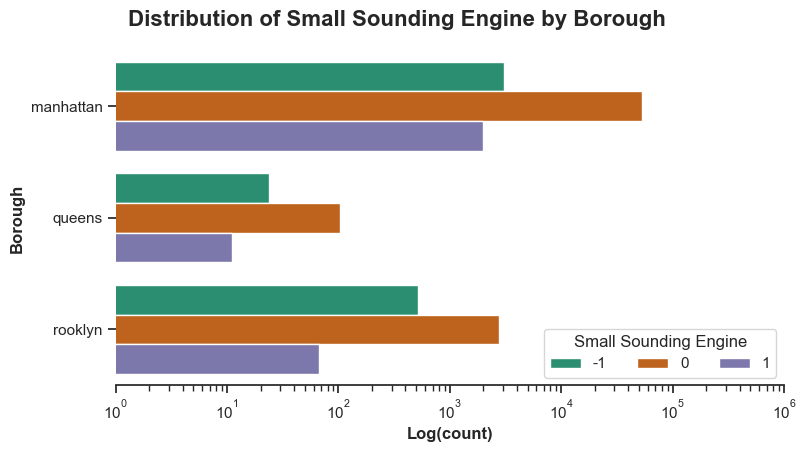

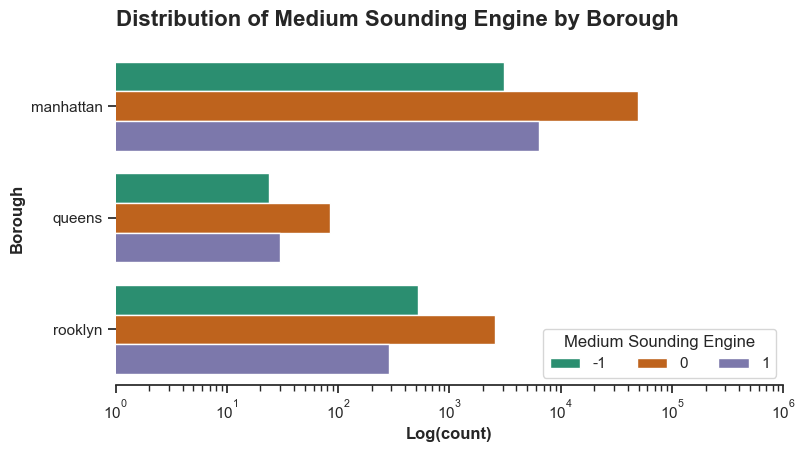

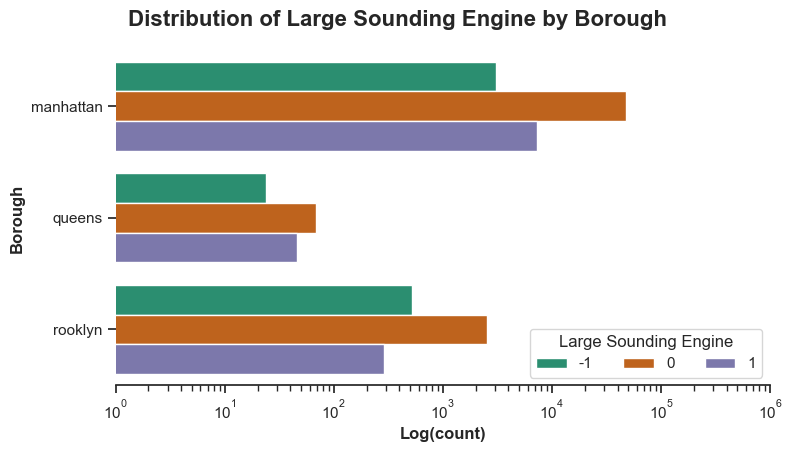

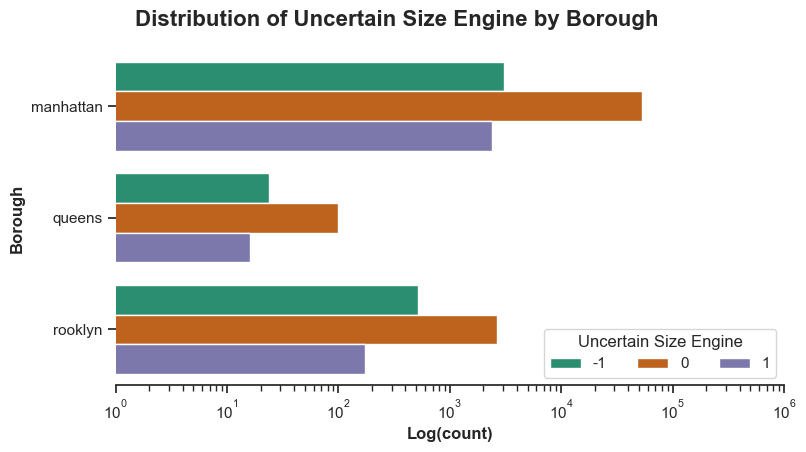

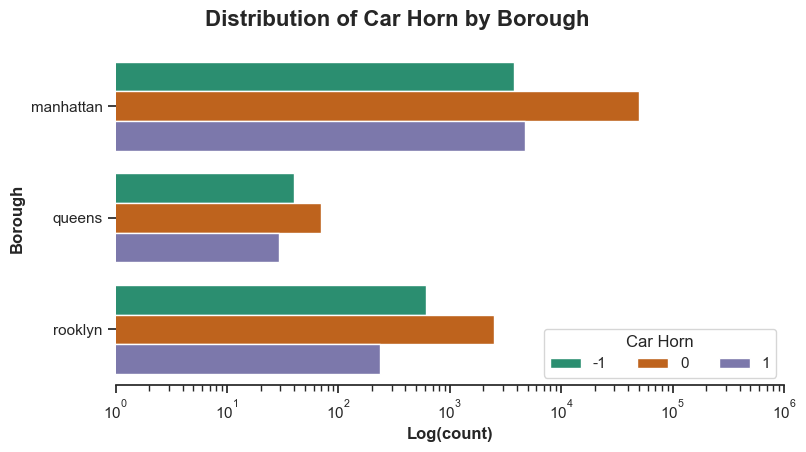

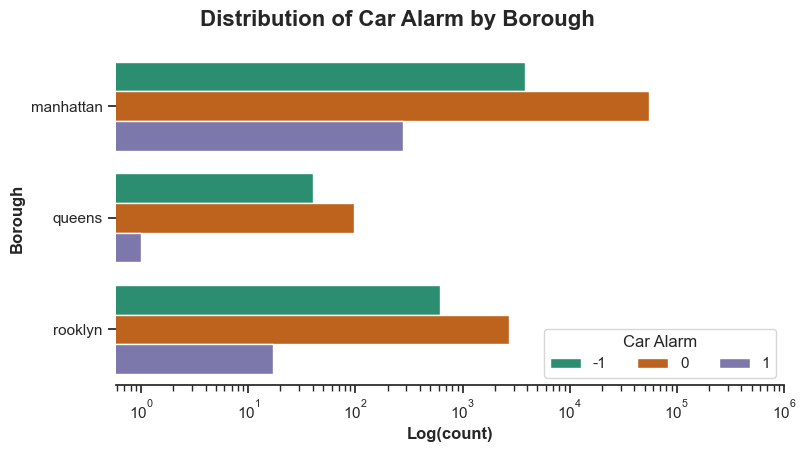

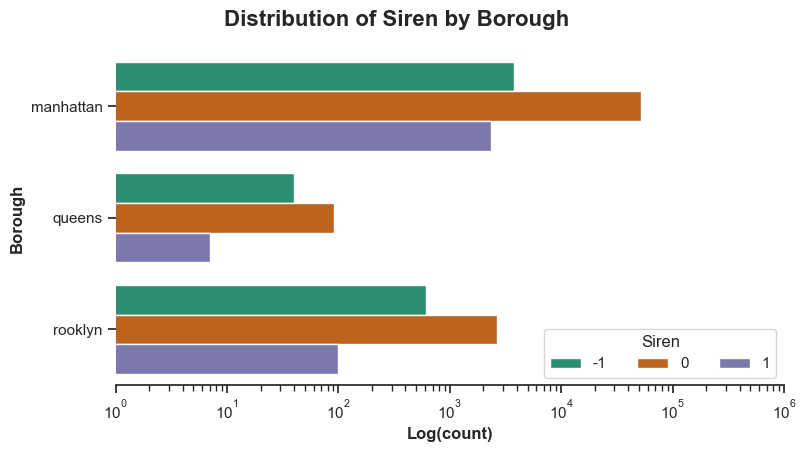

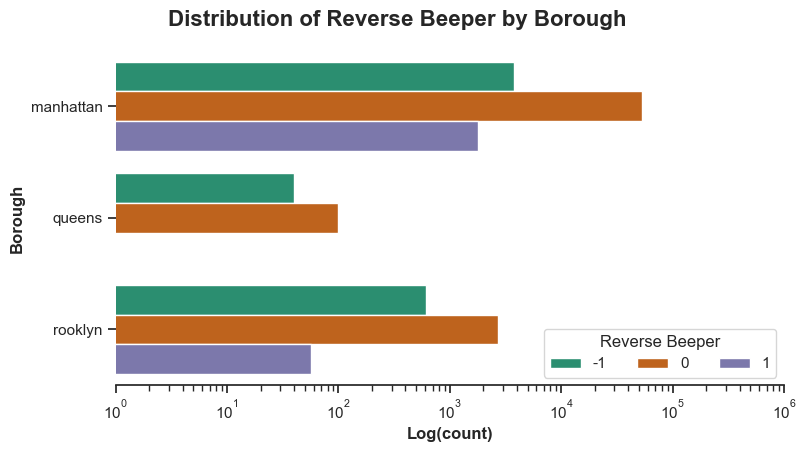

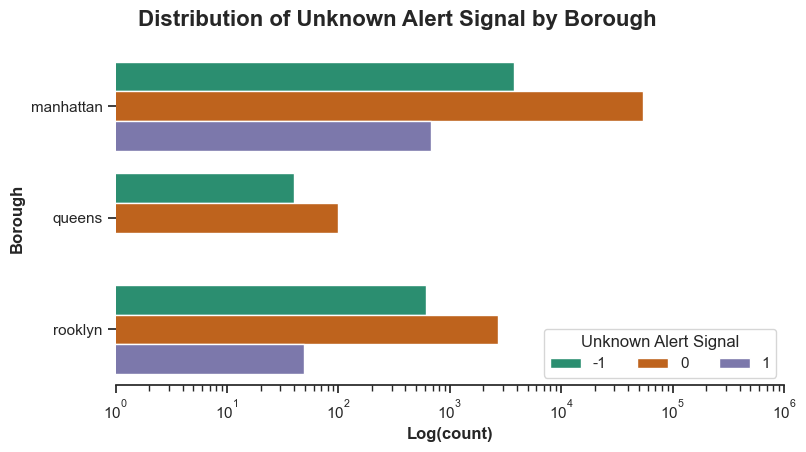

In [218]:
# Grafica de la distribucion de presencia de tipos de sonido por borough en NYC
plot_sound_presence_distribution(pd.read_parquet(inte_data_dir('noise_pollution.parquet')))

### EDA

In [219]:
# Data procesada
noise_pollution_proc

,borough,date,small_sounding_engine,medium_sounding_engine,large_sounding_engine,uncertain_size_engine,car_horn,car_alarm,siren,reverse_beeper,unknown_alert_signal,borough_id
0,manhattan,1,39.583333,128.869048,164.285714,50.148810,84.375000,6.696429,50.595238,45.684524,14.732143,1
1,manhattan,2,25.000000,76.488095,95.089286,26.934524,53.422619,3.125000,23.660714,22.321429,7.440476,1
2,manhattan,3,20.386905,59.077381,53.273810,20.684524,45.833333,2.083333,30.505952,12.351190,5.952381,1
3,manhattan,4,21.577381,59.821429,65.178571,19.494048,47.321429,3.571429,25.446429,20.238095,7.738095,1
4,manhattan,5,21.130952,68.005952,73.065476,29.017857,59.672619,4.017857,24.255952,19.791667,5.952381,1
5,manhattan,6,20.238095,51.934524,52.083333,22.321429,47.023810,2.380952,18.154762,16.517857,6.547619,1
6,manhattan,7,19.791667,66.369048,71.726190,24.702381,43.601190,3.422619,19.196429,15.922619,6.696429,1
7,manhattan,8,23.958333,63.541667,69.642857,26.934524,47.172619,1.934524,19.345238,14.285714,7.142857,1
8,manhattan,9,21.875000,62.648810,70.089286,20.684524,52.380952,1.488095,16.815476,16.517857,6.547619,1
9,manhattan,10,22.916667,85.416667,91.369048,29.017857,65.327381,4.166667,30.357143,23.958333,10.119048,1


### Gráfica de las registro de sonidos/audios por Borough

In [45]:
import folium
from folium.plugins import MiniMap

### Gráfico en una mapa

In [13]:
import folium
from folium.plugins import MarkerCluster

In [14]:
# Crear mapa centrado en Nueva York
mapa = folium.Map(location=[noise_pollution['latitude'].mean(), noise_pollution['longitude'].mean()], zoom_start=14)

# Crear cluster para agrupar los marcadores
cluster = MarkerCluster().add_to(mapa)

# Iterar sobre los registros y crear marcadores en el mapa
for index, row in noise_pollution.iterrows():
    popup = folium.Popup(f"<b>{row['borough']}</b>: {row['1-1_small-sounding-engine_presence']}")
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup).add_to(cluster)
    
# Mostrar mapa
# mapa